# 📊 Análise de Dados de Vendas 

Este notebook apresenta uma análise exploratória de dados (EDA) aplicada a um conjunto de dados de vendas, com foco em **limpeza, tratamento, análise e visualização** para extração de **insights de negócio**.

As análises foram desenvolvidas utilizando **Python, Pandas e Matplotlib**, simulando um fluxo de trabalho comum em ambientes corporativos orientados por dados.


## 🧰 Bibliotecas Utilizadas

As bibliotecas abaixo foram utilizadas para manipulação, análise e visualização dos dados ao longo do projeto:

- **Pandas**: utilizada para leitura, limpeza, transformação e agregação dos dados, permitindo o cálculo de métricas e a criação de novas variáveis.
- **Matplotlib**: utilizada para a criação de visualizações gráficas, facilitando a interpretação dos resultados e a comunicação dos insights gerados.


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

## 📂 Carregamento dos Dados

O conjunto de dados foi carregado a partir de um arquivo CSV e armazenado em um DataFrame, permitindo sua manipulação e análise ao longo do projeto.


In [50]:
df = pd.read_csv(r"..\data\raw\loja_pedidos.csv")
df

,order_id,item_name,choice_description,quantity,item_price,order_date
0,1098,Boné,[Sem estampa],4,$98.21,2024-06-04
1,1017,Pulseira,[Simples],4,,2024-02-14
2,1055,Blusa,"[Azul, M]",3,$59.88,2024-05-03
3,1068,Broche,[Simples],2,$62.30,2024-05-12
4,1059,Camiseta,"[Azul, M]",2,$82.68,2024-02-24
...,...,...,...,...,...,...
195,1061,Boné,[Simples],1,$81.46,2024-03-30
196,1010,Ecobag,"[Preto, G]",3,$58.53,2024-03-26
197,1097,Chaveiro,[Estampada],2,$22.11,2024-03-07
198,1090,Pulseira,[Sem estampa],5,$90.90,2024-01-31


##  Análise Inicial do Dataset

Nesta etapa, analisamos a estrutura do conjunto de dados, os tipos das colunas e uma amostra dos registros para compreender o conteúdo antes do tratamento.


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            200 non-null    int64 
 1   item_name           200 non-null    object
 2   choice_description  190 non-null    object
 3   quantity            200 non-null    int64 
 4   item_price          200 non-null    object
 5   order_date          200 non-null    object
dtypes: int64(2), object(4)
memory usage: 9.5+ KB


In [52]:
df.head(5)

,order_id,item_name,choice_description,quantity,item_price,order_date
0,1098,Boné,[Sem estampa],4,$98.21,2024-06-04
1,1017,Pulseira,[Simples],4,,2024-02-14
2,1055,Blusa,"[Azul, M]",3,$59.88,2024-05-03
3,1068,Broche,[Simples],2,$62.30,2024-05-12
4,1059,Camiseta,"[Azul, M]",2,$82.68,2024-02-24


## 🧹 Identificação de Valores Nulos

Foi realizada a verificação de valores nulos e campos vazios no dataset, que poderiam impactar as análises e métricas de negócio.


In [53]:
(df.isnull() | (df == "")).sum()


order_id               0
item_name              0
choice_description    10
quantity               0
item_price             0
order_date             0
dtype: int64

### ✏️ Tratamento de Descrições Ausentes

Valores ausentes na coluna de descrição foram preenchidos com um valor padrão, garantindo consistência e evitando perda de informação durante as análises.


In [54]:
df["choice_description"] = df["choice_description"].fillna("Sem descrição")
df.head(20)

,order_id,item_name,choice_description,quantity,item_price,order_date
0,1098,Boné,[Sem estampa],4,$98.21,2024-06-04
1,1017,Pulseira,[Simples],4,,2024-02-14
2,1055,Blusa,"[Azul, M]",3,$59.88,2024-05-03
3,1068,Broche,[Simples],2,$62.30,2024-05-12
4,1059,Camiseta,"[Azul, M]",2,$82.68,2024-02-24
5,1000,Mochila,"[Azul, M]",5,$88.38,2024-02-01
6,1021,Boné,[Simples],5,$66.46,2024-02-09
7,1020,Camiseta,[Edição limitada],4,$36.04,2024-02-10
8,1049,Chaveiro,[Sem estampa],4,$92.40,2024-01-24
9,1012,Corrente,[Estampada],5,$92.13,2024-02-15


### 💲 Limpeza e Conversão da Coluna de Preços

A coluna de preços apresentava inconsistências, como símbolos monetários e valores não numéricos.  
Foi realizada a limpeza e conversão para o tipo numérico (`float`), com tratamento de erros.


In [55]:
df["item_price"] = (
    df["item_price"]
    .astype(str)                    # Transforma tudo em string ex: Nan, None
    .str.replace("$", "", regex=False)  # remove o símbolo $, regex para indicar o valor literal de $
    .str.strip()                    # tira espaços antes e depois
)

# agora converte pra float, ignorando erros
#errors significa que se um valor não puder ser convertido ele vira Nan
df["item_price"] = pd.to_numeric(df["item_price"], errors="coerce")


## 🔍 Verificação de Valores Nulos

Conferência da existência de valores ausentes após o tratamento dos dados.


In [56]:

df["item_price"].isnull().sum()  # vê se ainda tem valores problemáticos

df[df["item_price"].isnull()]






,order_id,item_name,choice_description,quantity,item_price,order_date
1,1017,Pulseira,[Simples],4,NaN,2024-02-14
16,1011,Camiseta,[Edição limitada],5,NaN,2024-01-07
34,1084,Corrente,"[Branco, P]",3,NaN,2024-02-28
38,1053,Corrente,"[Cinza, G]",1,NaN,2024-02-19
45,1059,Mochila,"[Azul, M]",3,NaN,2024-01-17
92,1080,Corrente,[Simples],4,NaN,2024-06-02
116,1014,Broche,Sem descrição,4,NaN,2024-06-17
118,1021,Camiseta,"[Preto, G]",4,NaN,2024-03-17
136,1037,Corrente,[Com logo],3,NaN,2024-03-25
181,1099,Corrente,"[Preto, G]",3,NaN,2024-05-11


## 🔄 Preenchimento de Valores de Preço Ausentes

Para valores de preço ausentes, foi adotada a seguinte estratégia:

- Utilização da **moda do preço por item**, quando disponível
- Utilização da **média**, quando a moda não estava disponível

Essa abordagem preserva a coerência dos dados sem introduzir valores arbitrários.


In [57]:

df["item_price"] = df.groupby("item_name")["item_price"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean())
)
df["item_price"] 

0      98.21
1      26.24
2      59.88
3      62.30
4      82.68
       ...  
195    81.46
196    58.53
197    22.11
198    90.90
199    60.49
Name: item_price, Length: 200, dtype: float64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            200 non-null    int64  
 1   item_name           200 non-null    object 
 2   choice_description  200 non-null    object 
 3   quantity            200 non-null    int64  
 4   item_price          200 non-null    float64
 5   order_date          200 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


## 📈 Métricas Gerais de Vendas

Nesta etapa, foram calculadas métricas fundamentais para compreensão do desempenho das vendas.


* QUANTOS PEDIDOS UNICOS FORAM FEITOS?

In [59]:
total_orders = len(set(df["order_id"]))

print("Total de pedidos:", total_orders)

Total de pedidos: 87


* QUANTOS ITENS DIFERENTES FORAM VENDIDOS?

In [60]:
total_items = len(set(df["item_name"]))
print("Total de itens:", total_items)

Total de itens: 10


## 🏆 Análise de Desempenho por Produto

A seguir, são analisados os produtos mais vendidos e aqueles que geraram maior receita.


* QUAL O ITEM MAIS VENDIDO DE ACORDO COM A QUANTIDADE?

In [61]:
best_item_seller = df.groupby("item_name").sum()["quantity"]
print("Item mais vendido:", best_item_seller.idxmax())

Item mais vendido: Broche


* QUAL O ITEM DE MAIOR RECEITA?

In [62]:
df["revenue"] = df["item_price"] * df["quantity"]
best_revenue= df.groupby("item_name").sum()["revenue"].sort_values(ascending=False)
best_revenue.head(1)

item_name
Broche    3912.45
Name: revenue, dtype: float64

## 📊 Top 10 Itens Mais Vendidos

O gráfico abaixo apresenta os 10 itens mais vendidos em quantidade, permitindo uma comparação direta do desempenho dos produtos.


GRAFICO DE BARRAS

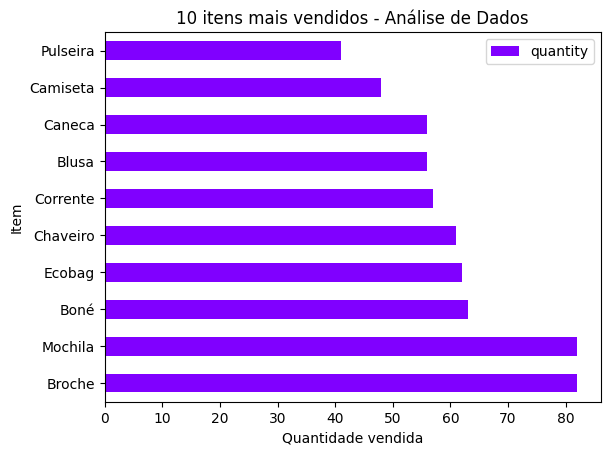

In [63]:
best_sellers = (
    df.groupby("item_name")["quantity"]
      .sum()
      .sort_values(ascending=False)
      .to_frame()
)

ax = best_sellers.head(10).plot(
    kind="barh",
    title="10 itens mais vendidos - Análise de Dados",
    colormap="rainbow"
)

ax.set_xlabel("Quantidade vendida")
ax.set_ylabel("Item")

fig = ax.get_figure()
fig.savefig(
    r"..\outputs\figures\best_sellers_bar.png",
    dpi=300,
    bbox_inches="tight"
)


## 🥧 Distribuição Percentual dos Itens Mais Vendidos

O gráfico de pizza mostra a participação percentual dos 10 itens mais vendidos no total de vendas.


GRÁFICO DE PIZZA

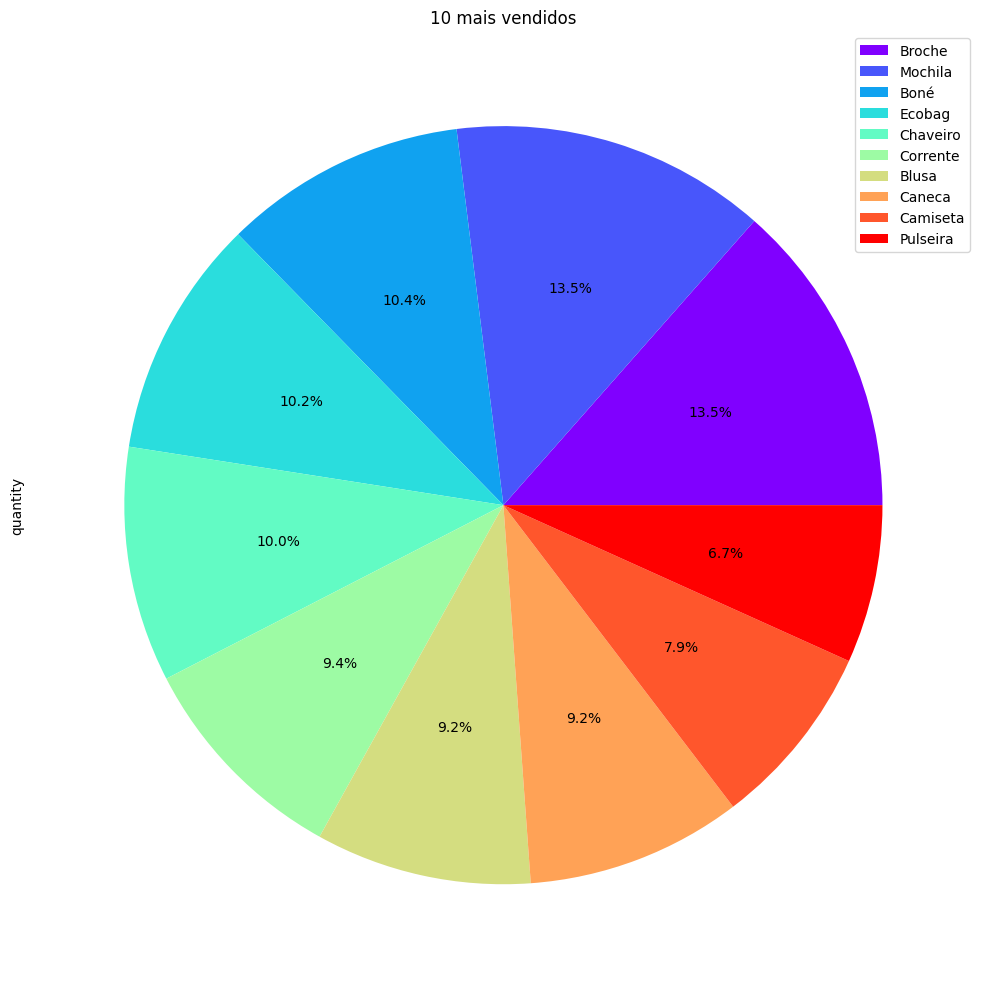

In [64]:
ax = best_sellers.head(10).plot(
    kind="pie", 
    y="quantity", 
    title="10 mais vendidos", 
    figsize=(10,10),
    colormap="rainbow",
    autopct="%1.1f%%",  # mostra as porcentagens
    legend=True,         
    labels=None
)

# Salvar a figura
fig = ax.get_figure()
fig.tight_layout()  # ajustar layout para não cortar o título
fig.savefig("../outputs/figures/best_sellers_pie.png")


## 📆 Receita por Período Semestral

Agregação da receita em períodos semestrais para análise do comportamento do faturamento ao longo do tempo, reduzindo a granularidade diária e facilitando a identificação de tendências.


GRAFICO DE LINHA

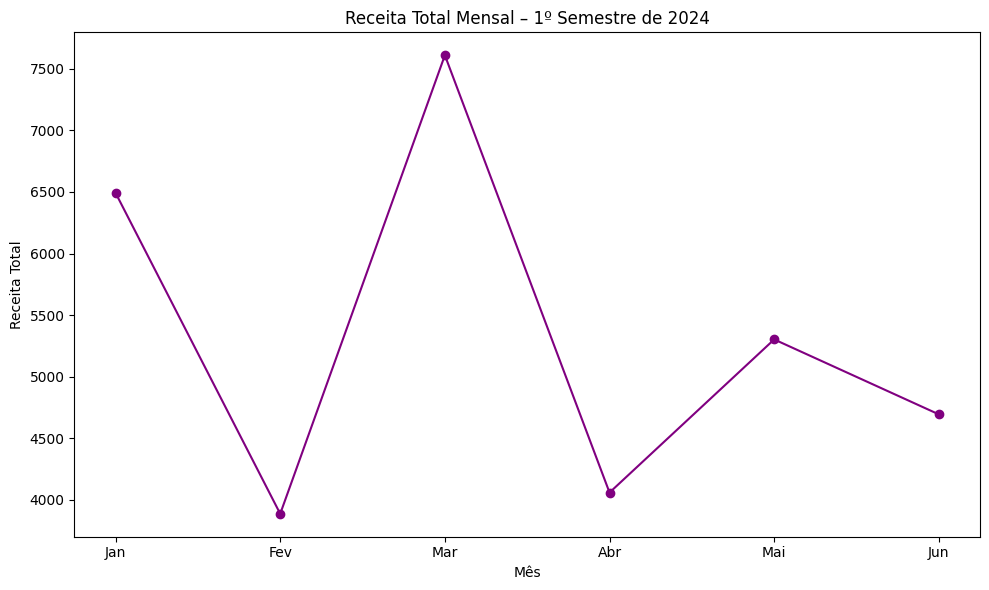

In [74]:
# Garantindo que a coluna de data está no formato datetime
df["order_date"] = pd.to_datetime(df["order_date"])

# Criando coluna de mês
df["order_month"] = df["order_date"].dt.month

# Agrupando a receita por mês
revenue_by_month = (
    df.groupby("order_month")["revenue"]
    .sum()
    .sort_index()
)

# Substituindo número do mês por nome
month_labels = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun"]
revenue_by_month.index = month_labels[:len(revenue_by_month)]

# Plotando o gráfico
ax = revenue_by_month.plot(
    kind="line",
    figsize=(10, 6),
    marker="o",
    title="Receita Total Mensal – 1º Semestre de 2024",
    color="purple"
)

ax.set_xlabel("Mês")
ax.set_ylabel("Receita Total")

# Ajustes finais e salvamento
fig = ax.get_figure()
fig.tight_layout()
fig.savefig(
    "../outputs/figures/revenue_by_month_1sem_2024.png",
    dpi=300,
    bbox_inches="tight"
)


## 💰 Média de Receita por Pedido

Cálculo da receita média gerada por pedido, com o objetivo de avaliar o valor médio de compra dos clientes.


In [66]:
revenue_order_mean = (
    df.groupby("order_id")["revenue"]
      .sum()
      .mean()
)

print("A média de receita por pedido é:", round(revenue_order_mean, 2))


A média de receita por pedido é: 368.34


## 📅 Dia com Maior Faturamento

Identificação do dia com maior volume de faturamento a partir da agregação da receita diária, permitindo destacar o período de melhor desempenho em vendas.


In [67]:

best_day_seller = df.groupby("order_date")["revenue"].sum()

data_top = best_day_seller.idxmax() # pega a data com maior receita
valor_top = best_day_seller.loc[data_top]  # pega o valor dessa data

print("O dia com mais faturamento foi:",data_top.strftime("%d/%m/%y"))



print("com faturamento de: R$", valor_top)

O dia com mais faturamento foi: 31/01/24
com faturamento de: R$ 941.48


## 🏷️ Item Mais Vendido por Descrição

Análise da combinação entre descrição e item para identificar a variação mais vendida com base na quantidade total comercializada, permitindo entender preferências dos clientes.


In [68]:
# Garantindo que vamos somar apenas a coluna 'quantity'
best_item_choice_description = (
    df.groupby(["choice_description", "item_name"])["quantity"]
      .sum()
)

# Pegando a combinação com maior quantidade
top_item = best_item_choice_description.idxmax()
top_item_quantity = best_item_choice_description.max()

# Mostrando o resultado
print(
    f"Descrição: {top_item[0]}\n"
    f"Item: {top_item[1]}\n"
    f"Quantidade: {int(top_item_quantity)}"
)


Descrição: [Simples]
Item: Boné
Quantidade: 20


## 🧾 Pedido com Maior Valor Total

Nesta etapa, foi identificado o pedido com maior faturamento total, considerando todos os itens associados.


In [69]:
total_order_value = df.groupby("order_id")["revenue"].sum()
top_order = total_order_value.idxmax()
top_order_revenue = total_order_value.loc[top_order]


print(f"O pedido com maior valor é o número: {top_order},\n com faturamento de: R${round(top_order_revenue, 2)}")


O pedido com maior valor é o número: 1090,
 com faturamento de: R$1503.11


## 📤 Exportação de Resultados

Os principais resultados da análise foram exportados para facilitar o uso em relatórios e dashboards externos.


- Exportação dos **10 itens mais vendidos** para Excel
- Exportação do **dataset tratado** em formato CSV


* Exportando para Excel

In [70]:
top_10_sellers = best_sellers.head(10)
top_10_sellers.to_excel("../outputs/reports/top_10_sellers.xlsx")

* Exportando csv processado

In [71]:
df.to_csv(
    "../data/processed/loja_pedidos_tratado.csv",
    index=False,
    encoding="utf-8"
)


## ✅ Conclusão

A análise permitiu identificar padrões de vendas, produtos estratégicos e períodos de maior faturamento.  
Os resultados demonstram como a análise de dados pode apoiar decisões comerciais, otimização de estoque e estratégias de negócio.
